In [1]:
import pandas as pd

In [2]:
db1=pd.read_csv('Players.csv')

In [3]:
db2=pd.read_csv('Seasons_stats.csv')

In [4]:
db=db2.merge(db1, left_on='Player', right_on='Player', how='left')

In [5]:
db.head(5)

,Unnamed: 0_x,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,TOV,PF,PTS,Unnamed: 0_y,height,weight,collage,born,birth_city,birth_state
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,NaN,217.0,458.0,0,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,NaN,99.0,279.0,1,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,NaN,192.0,438.0,2,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,NaN,29.0,63.0,3,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,NaN,27.0,59.0,3,196.0,88.0,North Carolina State University,1925.0,NaN,NaN


In [6]:
db1=db[['Player','Pos','Year','Age','Tm','PTS','WS','height','weight','collage']]

In [7]:
db1=db1.dropna()
db1.shape

(22356, 10)

In [8]:
db1.head(5)

,Player,Pos,Year,Age,Tm,PTS,WS,height,weight,collage
0,Curly Armstrong,G-F,1950.0,31.0,FTW,458.0,3.5,180.0,77.0,Indiana University
1,Cliff Barker,SG,1950.0,29.0,INO,279.0,2.2,188.0,83.0,University of Kentucky
2,Leo Barnhorst,SF,1950.0,25.0,CHS,438.0,3.6,193.0,86.0,University of Notre Dame
3,Ed Bartels,F,1950.0,24.0,TOT,63.0,-0.6,196.0,88.0,North Carolina State University
4,Ed Bartels,F,1950.0,24.0,DNN,59.0,-0.6,196.0,88.0,North Carolina State University


In [9]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
import warnings
warnings.simplefilter('ignore')
%pylab inline
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 6,3
import pandas as pd
import seaborn as sns
import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go


init_notebook_mode(connected=True)

Populating the interactive namespace from numpy and matplotlib


In [10]:
av_age=db1.groupby('Year').mean()['Age']

Как менялся средний возраст игрока по годам, используем обычный линейный график

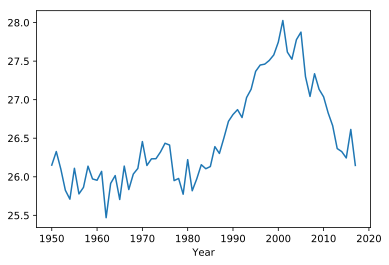

In [11]:
av_age.plot()

In [23]:
def classified(row):
    if row['WS']>3:
        return 3
    if row['WS']>2:
        return 2
    if row['WS']>1:
        return 1
    else:
        return 0

In [24]:
db1['rating']=db1.apply(classified, axis=1)

In [25]:
db1.head(5)

,Player,Pos,Year,Age,Tm,PTS,WS,height,weight,collage,rating
0,Curly Armstrong,G-F,1950.0,31.0,FTW,458.0,3.5,180.0,77.0,Indiana University,3
1,Cliff Barker,SG,1950.0,29.0,INO,279.0,2.2,188.0,83.0,University of Kentucky,2
2,Leo Barnhorst,SF,1950.0,25.0,CHS,438.0,3.6,193.0,86.0,University of Notre Dame,3
3,Ed Bartels,F,1950.0,24.0,TOT,63.0,-0.6,196.0,88.0,North Carolina State University,0
4,Ed Bartels,F,1950.0,24.0,DNN,59.0,-0.6,196.0,88.0,North Carolina State University,0


Распределение баллов игроков в зависимости от рейтинга (категории доли побед)

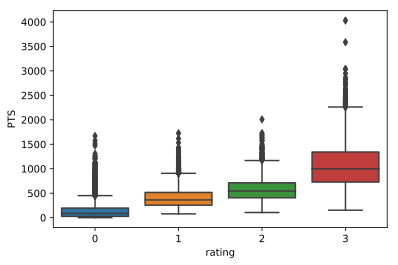

In [28]:
sns.boxplot(x='rating', y='PTS', data=db1[['rating','PTS']])

Зависимость балла игрока от роста

In [27]:
sns.jointplot(x='height', y='PTS', data=db1, kind='scatter')

In [65]:
agg_PTS=db1.groupby('collage').mean()['PTS'].sort_values(ascending=False).head(10).reset_index()
quantity_players=db1.groupby('collage').count()['PTS']
quantity_players1=quantity_players[quantity_players.index.isin(agg_PTS['collage'].values)].reset_index()
quantity_players1


,collage,PTS
0,Gardner-Webb University,11
1,Illinois Wesleyan University,14
2,Louisiana Tech University,54
3,Marist College,12
4,North Carolina Central University,12
5,Prairie View A&M University,8
6,State University of New York College at Buffalo,14
7,Trinity Valley Community College,14
8,United States Naval Academy,14
9,University of Central Arkansas,17


In [93]:

trace = go.Bar(x=agg_PTS['collage'],y=agg_PTS['PTS'],name='agg_PTS',orientation = 'v')

trace1 = go.Bar(x=quantity_players1['collage'],y=quantity_players1['PTS']*10,name='Quantity_players',orientation = 'v')

data = [trace, trace1]


fig = go.Figure(data=data)
iplot(fig,show_link=False)

In [85]:
db2=db1[db1['Year']==2016].groupby('Tm').mean()
db2

,Year,Age,PTS,WS,height,weight,rating
Tm,,,,,,,
ATL,2016.0,27.692308,526.769231,3.192308,198.153846,96.615385,1.538462
BOS,2016.0,24.153846,588.846154,3.084615,199.076923,100.000000,1.615385
BRK,2016.0,26.000000,485.785714,1.521429,199.071429,96.928571,0.714286
CHI,2016.0,27.750000,485.250000,1.991667,199.416667,93.583333,0.833333
CHO,2016.0,25.714286,470.357143,2.914286,198.928571,96.000000,1.428571
CLE,2016.0,28.285714,366.071429,2.485714,199.142857,97.714286,1.285714
DAL,2016.0,28.250000,452.750000,2.083333,199.250000,98.083333,1.666667
DEN,2016.0,27.100000,431.800000,1.740000,197.600000,94.700000,1.100000
DET,2016.0,25.733333,507.666667,2.613333,198.866667,98.000000,1.466667


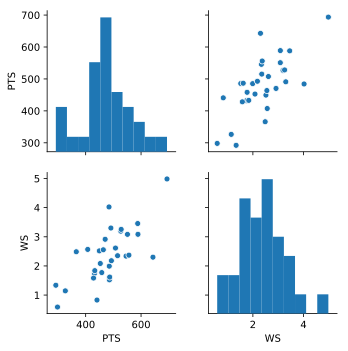

In [86]:
sns_plot = sns.pairplot(db2[['PTS', 'WS']])